# Objective :
    
    To classify/ predict a patient survive who had undergone surgery for brest cancer

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Attributes ans features information

In [3]:
df= pd.read_csv("haberman.csv")

df.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [4]:
#  change the column name
df = df.rename(columns = {'30':"age","64":"year","1":"node","1.1":"status"})


In [5]:
df.columns

Index(['age', 'year', 'node', 'status'], dtype='object')

In [6]:
#  number of rows and columns 
df.shape

(305, 4)

In [7]:
#check dataset is balanced or not
#  here 2 represent died patient 
#  here 1 ...............survived

df["status"].value_counts()

status
1    224
2     81
Name: count, dtype: int64

In [8]:
df.sample(10)

,age,year,node,status
199,57,64,9,1
94,46,63,0,1
157,53,59,3,2
132,50,64,0,1
64,43,64,0,2
203,57,63,0,1
38,39,63,4,1
5,33,60,0,1
125,50,59,0,1
122,49,67,1,1


In [9]:
# know about datasummary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   node    305 non-null    int64
 3   status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [10]:
#  to know statistical summary of data which is very important
df.describe()

,age,year,node,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Univariate Analysis (pdf, cdf, boxplot, violin plot)


# PDF (probbility density function)

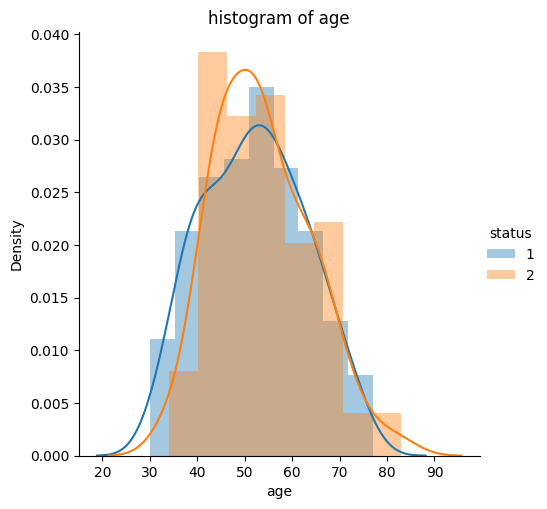

In [11]:
#  here we are using age feature to generate pdf()
#  pdf(smoothed form of histogram)
#  pdf basically shows, how many of points lies in the some interval

sns.FacetGrid(df, hue='status',height = 5)\
   .map(sns.distplot, "age")\
   .add_legend()
plt.title("histogram of age")
plt.ylabel("Density")
plt.show()

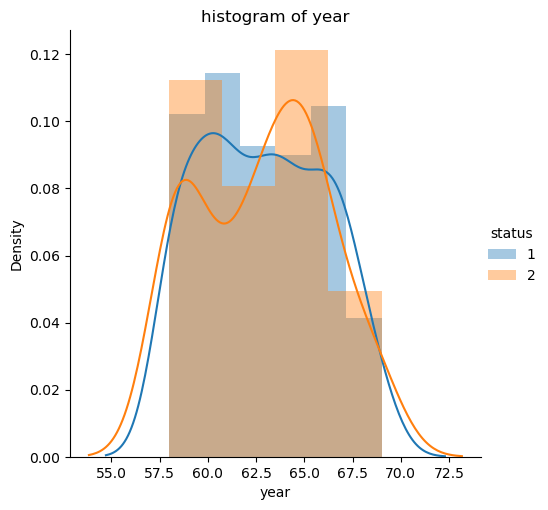

In [11]:
sns.FacetGrid(df, hue='status',height = 5)\
   .map(sns.distplot, "year")\
   .add_legend()
plt.title("histogram of year")
plt.ylabel("Density")
plt.show()

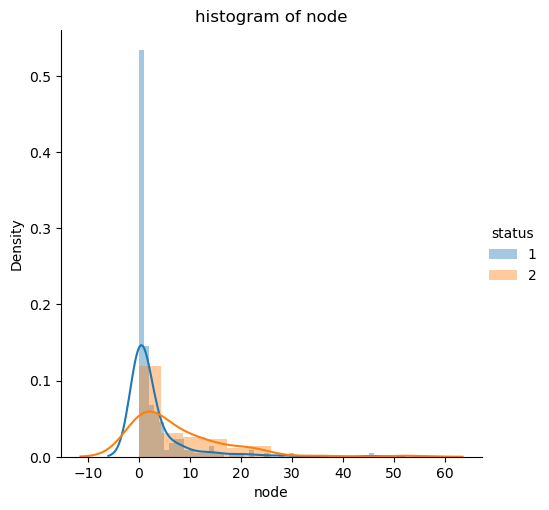

In [13]:
sns.FacetGrid(df, hue='status',height = 5)\
   .map(sns.distplot, "node")\
   .add_legend()
plt.title("histogram of node")
plt.ylabel("Density")
plt.show()

Observation

1. in all the plots the features are overlapping each other massively.
   But we can say
2. probabily 58% people survived who had 0-5 node +ve and 12% died as well

# CDF(Cummulative Distributed Function)

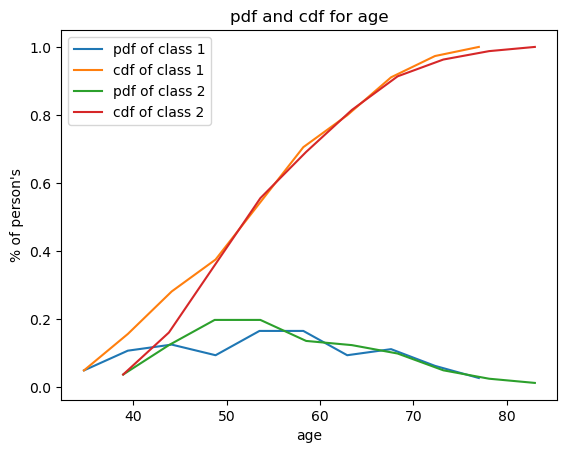

In [14]:
one = df.loc[df["status"] == 1]
two = df.loc[df["status"] == 2]
label = ["pdf of class 1","cdf of class 1","pdf of class 2","cdf of class 2"]

counts,bin_edges = np.histogram(one['age'],bins = 10, density= True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.title("pdf and cdf for age")
plt.xlabel("age")
plt.ylabel("% of person's")

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#  for who are not survived

counts,bin_edges = np.histogram(two['age'],bins = 10, density= True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

# plt.title("pdf and cdf for age")
# plt.xlabel("age")
# plt.ylabel("% of person's")

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(label)
plt.show()



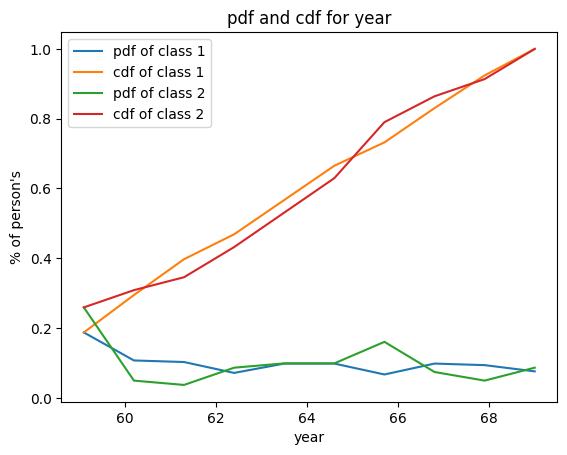

In [15]:

label = ["pdf of class 1","cdf of class 1","pdf of class 2","cdf of class 2"]

counts,bin_edges = np.histogram(one['year'],bins = 10, density= True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.title("pdf and cdf for year")
plt.xlabel("year")
plt.ylabel("% of person's")

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#  for who are not survived

counts,bin_edges = np.histogram(two['year'],bins = 10, density= True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

# plt.title("pdf and cdf for age")
# plt.xlabel("age")
# plt.ylabel("% of person's")

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(label)
plt.show()



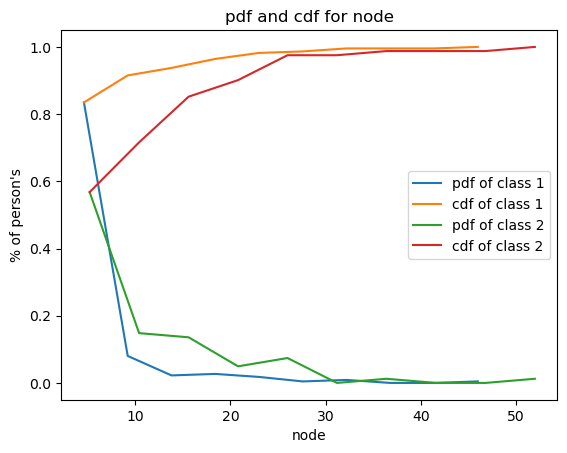

In [15]:

label = ["pdf of class 1","cdf of class 1","pdf of class 2","cdf of class 2"]

counts,bin_edges = np.histogram(one['node'],bins = 10, density= True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.title("pdf and cdf for node")
plt.xlabel("node")
plt.ylabel("% of person's")

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#  for who are not survived

counts,bin_edges = np.histogram(two['node'],bins = 10, density= True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

# plt.title("pdf and cdf for age")
# plt.xlabel("age")
# plt.ylabel("% of person's")

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(label)
plt.show()

# Box plot

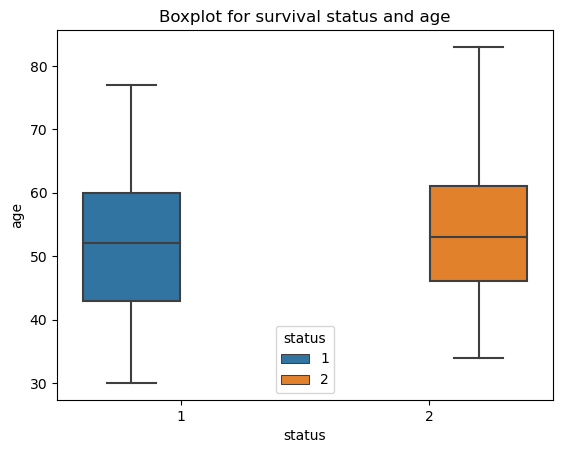

In [17]:
#   boxplot gives you the statical summary of data
#   Rectangle represent the 2nd and 3rd qurtile
#  the horizontal line inside box represent median
#  we can add title in box plot using either way 
#  plt.title(" Box plot for survival-status and age") or set_tital("")

sns.boxplot(x = "status",y="age",hue="status", data = df)\
   .set_title("Boxplot for survival status and age")
plt.show()

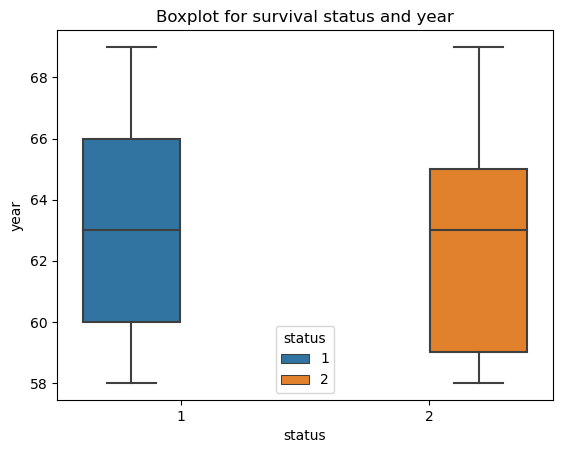

In [18]:
sns.boxplot(x = "status",y="year",hue="status", data = df)\
   .set_title("Boxplot for survival status and year")
plt.show()

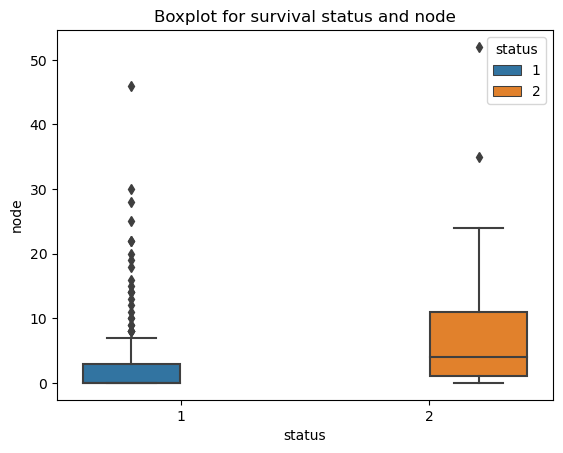

In [19]:
sns.boxplot(x = "status",y="node",hue="status", data = df)\
   .set_title("Boxplot for survival status and node")
plt.show()

# Voilin plot


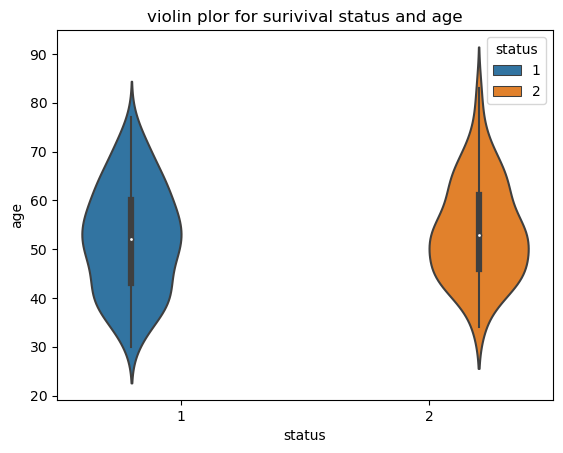

In [20]:
#  the voilin plot show the full distributin of the data.
#  It is combination of box plot and histogram
#  center dot represent median

sns.violinplot(x="status",y="age",hue ="status" , data=df)
plt.title("violin plor for surivival status and age")
plt.show()

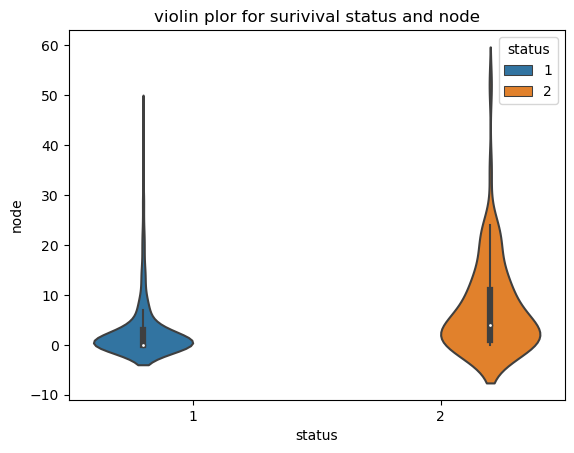

In [21]:
sns.violinplot(x="status",y="node",hue ="status" , data=df)
plt.title("violin plor for surivival status and node")
plt.show()

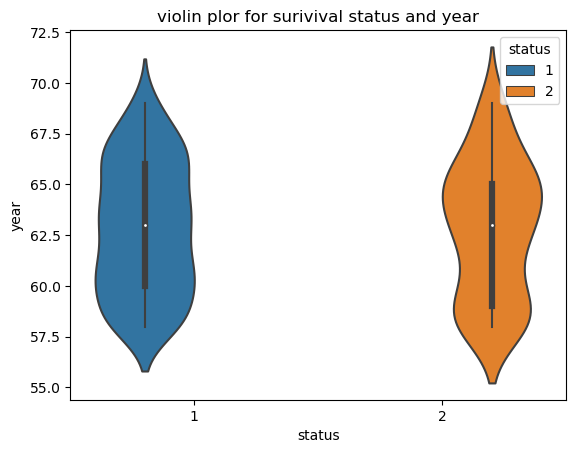

In [22]:
sns.violinplot(x="status",y="year",hue ="status" , data=df)
plt.title("violin plor for surivival status and year")
plt.show()

# Bivariate Analysis

# Scatter plot

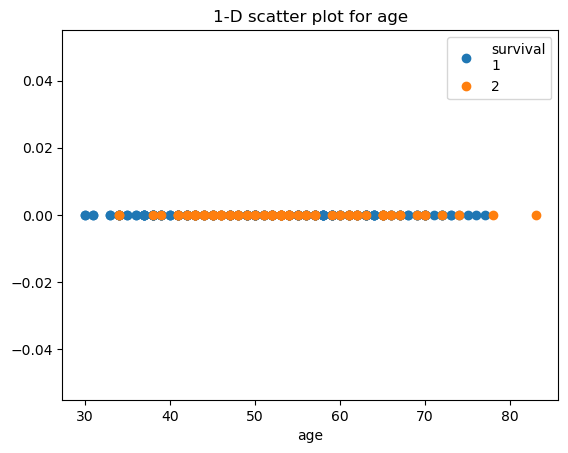

In [23]:
# 1-d scatter plot
one = df.loc[df["status"] == 1]
two = df.loc[df["status"] == 2]
plt.plot(one['age'], np.zeros_like(one["age"]),'o',label = "survival\n" "1")

plt.plot(two['age'], np.zeros_like(two['age']),'o',label="2")
plt.title("1-D scatter plot for age")
plt.xlabel("age")
plt.legend()
plt.show()

 ##Observation

1. After looking at this plot we can easily count number of point
that are there in age range who survived or not

2. Many person died whose age was between 41-70


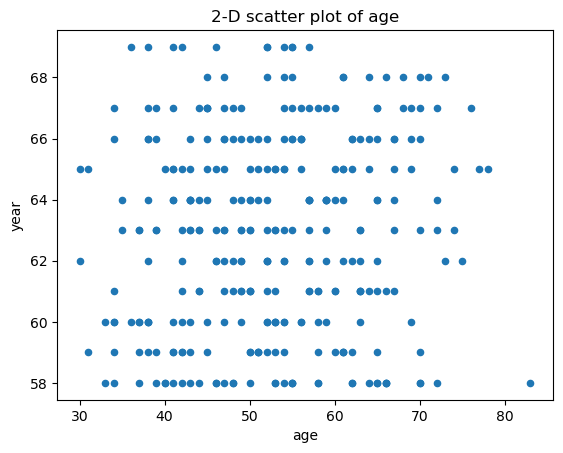

In [24]:
# 2d scatter plot

df.plot(kind = "scatter", x = "age", y="year")
plt.title("2-D scatter plot of age")
plt.show()

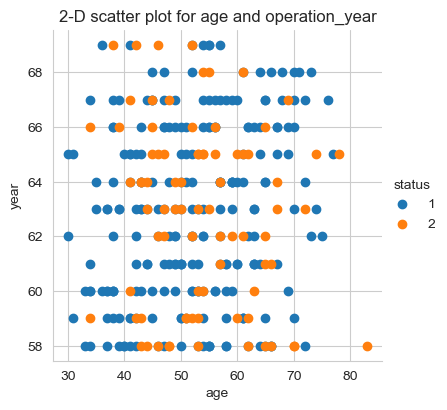

In [25]:
#  2d scatter plot with color coding for each class
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="status",height= 4)\
   .map(plt.scatter, "age","year")\
   .add_legend()
plt.title("2-D scatter plot for age and operation_year")
plt.show()

Text(0.5, 1.0, '2-D scatter plot for age and node')

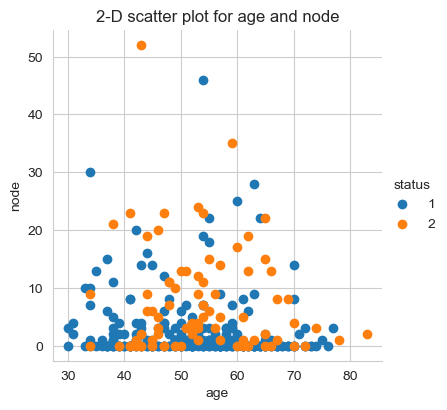

In [26]:
# 2d scatter plot
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="status",height=4)\
   .map(plt.scatter,"age","node")\
   .add_legend()
plt.title("2-D scatter plot for age and node")

Observation

1.in the above 2d scatter plot class label(i.e a person died or survived)
  is not linearly seprable
    
2.0-5  node person survived and died as well but the died ratio is less
  than survive ratio.

# Pair plot

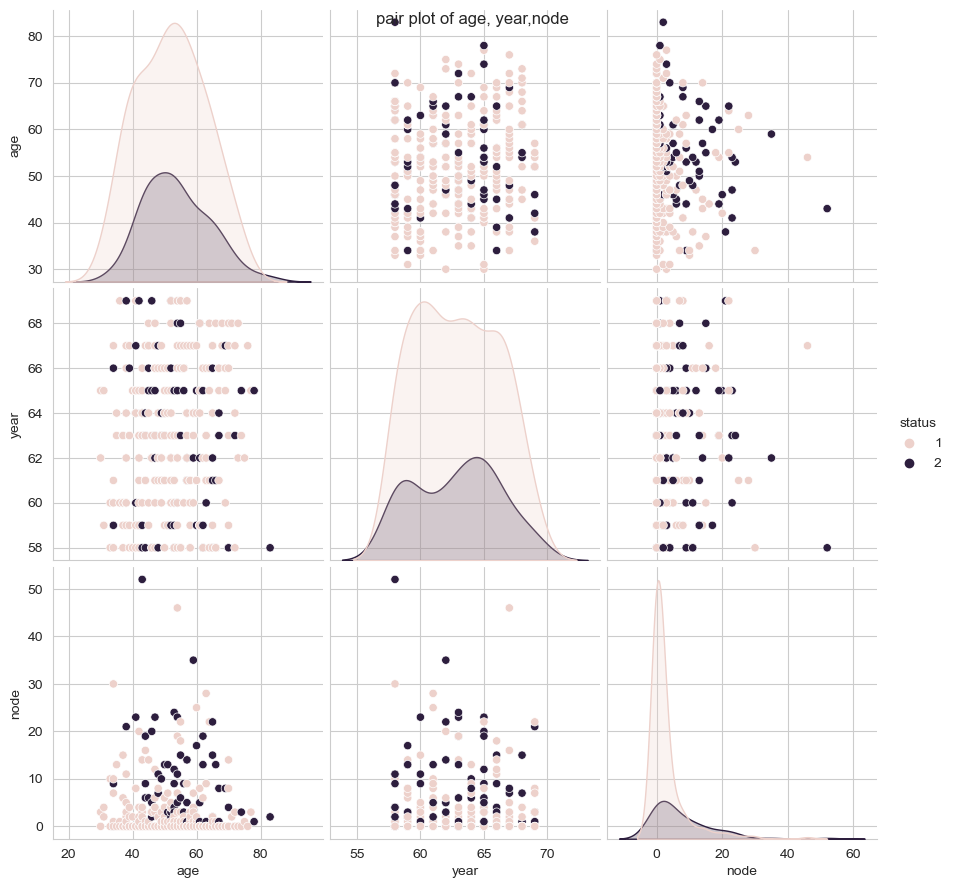

In [27]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="status",vars=["age","year","node"],size = 3)
plt.suptitle("pair plot of age, year,node")
plt.show()

Observation 
1. As we are unable to classify which is the most useful feature because of too
much overlapping. But, Somehow we can say, In operation_year ,60-65 more person died 
who has less than 6 node.

2. ANd hence this plot is not much informative in this case.

Conclusion
  . This give dataset is imbalanced 
    not linearly seprable 
    we can not build simple model using only if else condition we need to have
    some more complex technique to handle this dataset.
    